<a href="https://colab.research.google.com/github/SHDaniels/DSPS_sDaniels/blob/main/hw9_sDaniels/FINAL_shar_higgsbosonSearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
 !pip install kaggle

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data


In [3]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
# import kaggle

In [5]:
cd /content/drive/MyDrive

/content/drive/MyDrive


In [6]:
# !ls kaggle.json

In [7]:
# !mv kaggle.json .kaggle.json

In [8]:
# !chmod 600 .kaggle.json #2 is read, 4 is write, 7 is execute

In [9]:
# !ls -l .kag*

In [10]:
# envs = json.load(open(".kaggle.json", "r"))
# os.environ["KAGGLE_USERNAME"] = envs['username']
# os.environ["KAGGLE_KEY"] = envs['key']

In [11]:
# #check that it worked by listing the kaggle datasets
# !kaggle datasets list

In [12]:
# !kaggle competitions download -c higgs-boson

In [13]:
# !ls higgs-boson.zip

In [14]:
# !unzip higgs-boson.zip

In [15]:
# !unzip training.zip

In [16]:
higgsdata = pd.read_csv("training.csv")

In [17]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [18]:
#inspect, explore, clean the data as appropriate
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [19]:
import missingno as msno

In [20]:
higgsdata.replace(-999, np.NaN, inplace=True)

<Axes: >

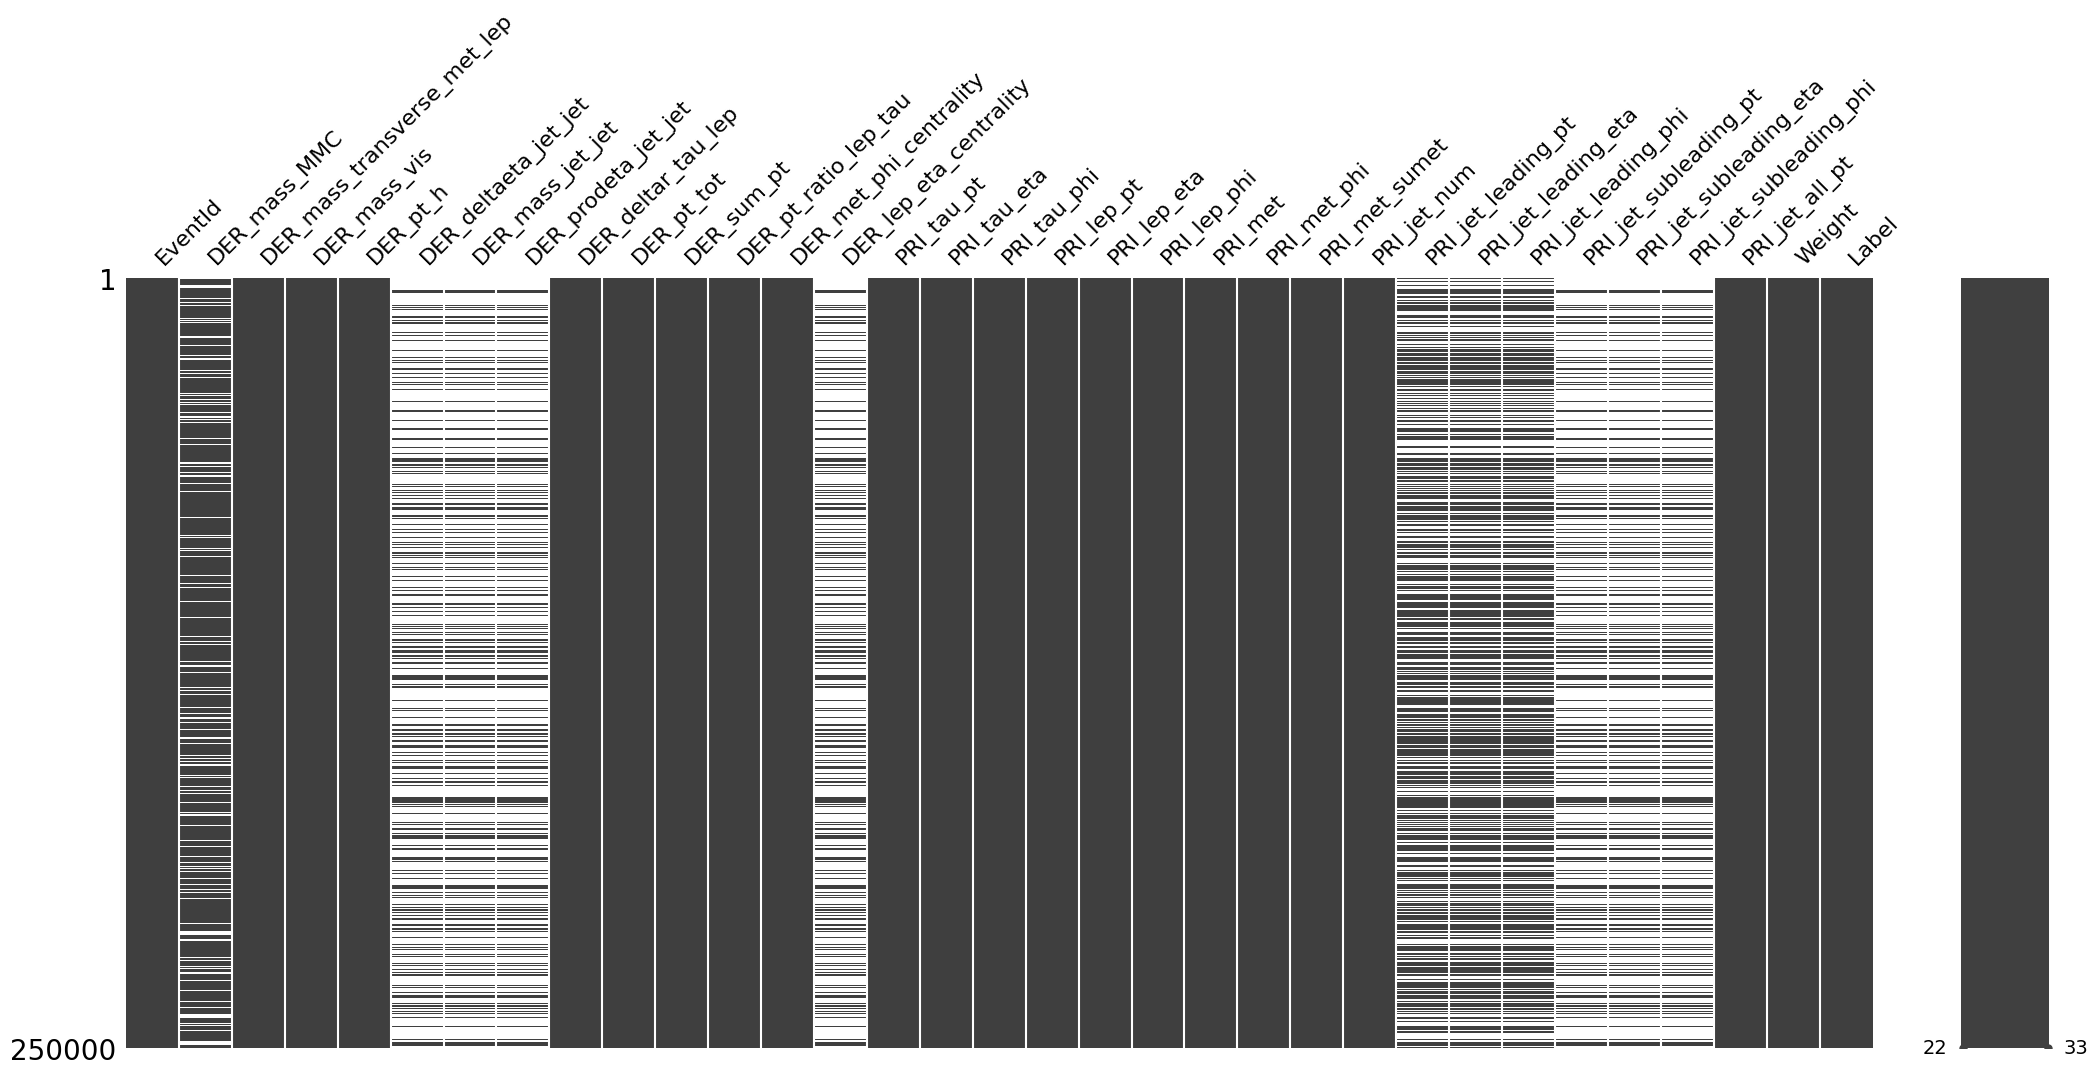

In [21]:
msno.matrix(higgsdata)

Figure 1. This is a matrix that shows any missing values in our data frame as white. I am going to remove the columns that are mostly white, and the rows where our second feature column is white.

In [22]:
higgsdata = higgsdata.drop(columns={"DER_lep_eta_centrality",
                                    "DER_deltaeta_jet_jet",
                                    "DER_mass_jet_jet",
                                    "DER_prodeta_jet_jet"
                                    })


In [23]:
higgsdata = higgsdata.drop(columns={"PRI_jet_subleading_phi",
                                    "PRI_jet_subleading_eta",
                                    "PRI_jet_subleading_pt",
                                    "PRI_jet_leading_phi"
                                    })

In [24]:
higgsdata = higgsdata.drop(columns={"PRI_jet_leading_pt", "PRI_jet_leading_eta"
                                    })

In [25]:
# higgsdata2 = higgsdata[higgsdata["DER_mass_MMC"]!=np.NaN]
higgsdata = higgsdata[~higgsdata.isin([np.NaN]).any(axis=1)] #paula gets credit for this line

<Axes: >

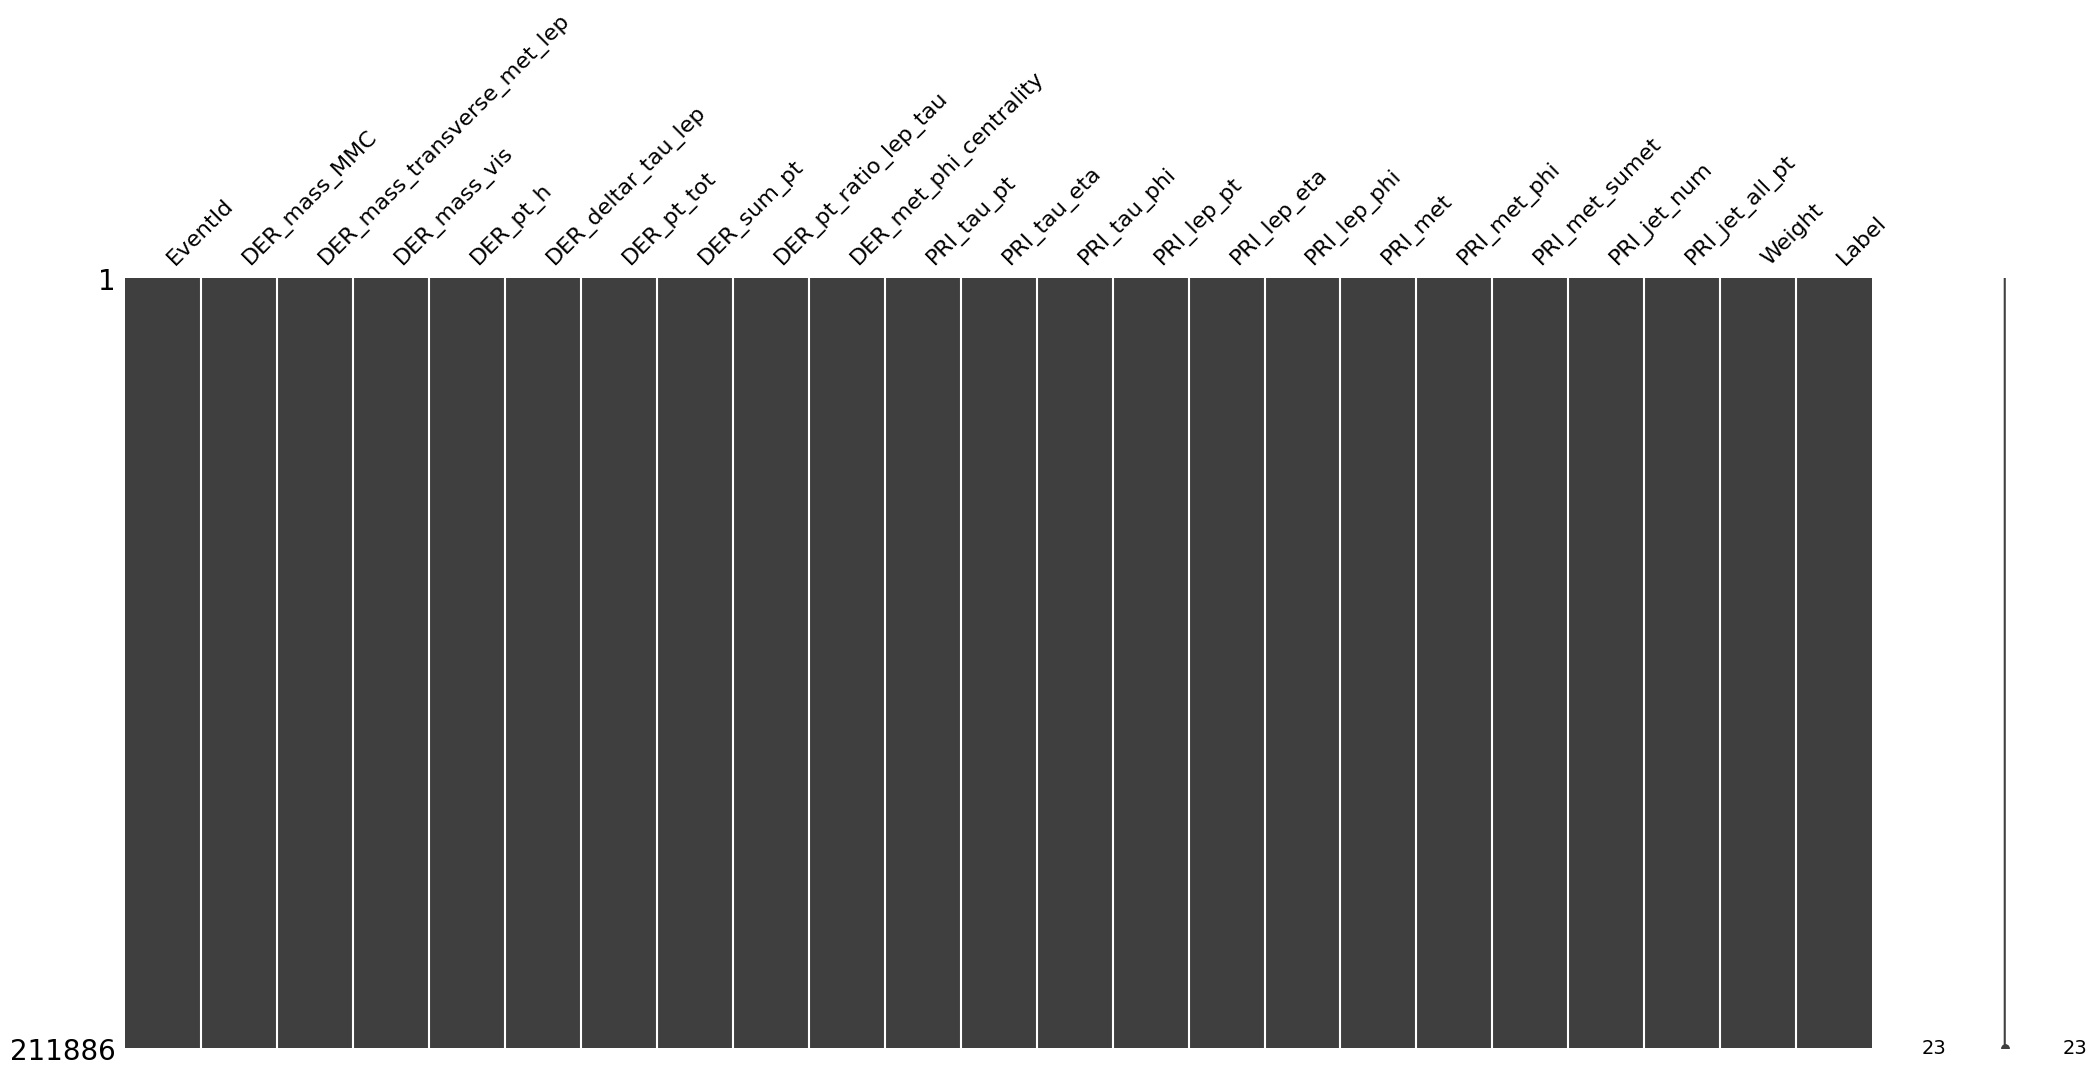

In [26]:
msno.matrix(higgsdata)

Figure 1.5. Same as above but now I fixed it so no more NaNs


- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [27]:
label = higgsdata["Label"].values

In [28]:
weight = higgsdata["Weight"].values
weight

array([2.65331134e-03, 2.23358449e+00, 5.44637821e+00, ...,
       6.40607773e-02, 1.86361167e-02, 1.68161144e+00])

In [29]:
higgsdata.drop(columns=["Weight", "Label"], inplace=True)

In [30]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000
5,100005,89.744,13.550,59.149,116.344,1.362,61.619,278.876,0.588,0.479,...,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,193.660


Text(0.5, 1.0, 'Higgs dataframe visualization')

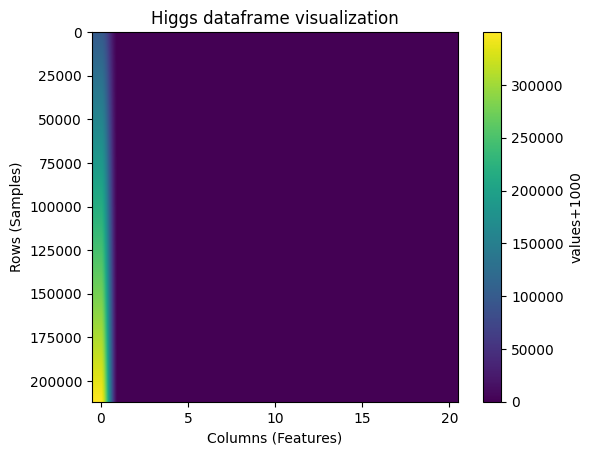

In [31]:

#also exploring it
plt.imshow(higgsdata, cmap='viridis', aspect=.0001, interpolation=None)
plt.colorbar(label='values+1000')
plt.xlabel('Columns (Features)')
plt.ylabel('Rows (Samples)')
plt.title('Higgs dataframe visualization')

Figure 2. Here I am looking at the general trends of the dataframe - we can see that the variabilite is much higher in some features than others. Based off this and the list of means and mins and maxes, I could choose to whiten the data, but that isn't necessary for tree models.

In [32]:
higgs_train, higgs_test, weight_train, weight_test, label_train, label_test  = train_test_split(
     higgsdata, weight, label, test_size=0.3, random_state=4)

In [33]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,3.064,41.928,197.760,1.582,1.396,...,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,113.497
1,100001,160.937,68.768,103.235,48.146,3.473,2.078,125.157,0.879,1.414,...,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226
3,100003,143.905,81.417,80.943,0.414,3.310,0.414,75.968,2.354,-1.285,...,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-0.000
4,100004,175.864,16.915,134.805,16.405,3.891,16.405,57.983,1.056,-1.385,...,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,0.000
5,100005,89.744,13.550,59.149,116.344,1.362,61.619,278.876,0.588,0.479,...,0.371,1.329,31.565,-0.884,1.857,40.735,2.237,282.849,3,193.660


In [34]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,...,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_all_pt
count,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,...,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000,211886.000000
mean,225059.477040,121.858528,42.001020,82.305844,63.228131,2.430013,19.338716,167.645039,1.428344,0.053725,...,-0.009794,-0.012684,47.208877,-0.014290,0.043263,38.261579,-0.004367,221.226658,1.070845,80.779081
std,72181.972028,57.298157,30.825474,39.039936,65.765518,0.765918,21.907415,119.000718,0.859173,1.191099,...,1.205610,1.816221,22.362090,1.249668,1.815649,32.651768,1.813294,128.695520,0.978572,101.011020
min,100000.000000,9.044000,0.000000,7.120000,0.000000,0.224000,0.000000,46.104000,0.047000,-1.414000,...,-2.499000,-3.142000,26.000000,-2.505000,-3.142000,0.109000,-3.142000,13.678000,0.000000,0.000000
25%,162529.750000,91.885250,15.751000,61.290000,20.710000,1.898000,3.045000,84.118000,0.859000,-1.346000,...,-0.915000,-1.576000,32.557000,-0.984000,-1.519000,19.272000,-1.570000,133.061000,0.000000,0.000000
50%,225107.500000,112.406000,37.649000,74.791500,43.582000,2.575000,14.331000,130.873000,1.259000,0.315000,...,-0.022000,-0.043000,41.010000,-0.036000,0.084000,30.656000,-0.012000,191.511500,1.000000,48.078000
75%,287582.750000,135.482000,63.349500,92.455500,86.432500,2.993000,28.085000,212.286750,1.776000,1.293000,...,0.893750,1.558000,54.235000,0.945000,1.618000,45.872000,1.566000,276.317500,2.000000,120.557500
max,349998.000000,1192.026000,594.287000,959.601000,2834.999000,5.684000,2834.999000,1852.462000,19.773000,1.414000,...,2.497000,3.142000,461.896000,2.502000,3.142000,2842.617000,3.142000,2003.976000,3.000000,1633.433000


In [35]:
label

array(['s', 'b', 'b', ..., 'b', 's', 'b'], dtype=object)

In [36]:
weight


array([2.65331134e-03, 2.23358449e+00, 5.44637821e+00, ...,
       6.40607773e-02, 1.86361167e-02, 1.68161144e+00])

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(min_samples_leaf=3, random_state=302, max_depth=6)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 302, 'verbose': 0, 'warm_start': False}


In [38]:
gbt = GradientBoostingClassifier(min_samples_leaf=5, random_state=302, max_depth=4)

In [39]:
rf.fit(higgs_train, label_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=3, random_state=302)

In [40]:
gbt.fit(higgs_train, label_train)

GradientBoostingClassifier(max_depth=4, min_samples_leaf=5, random_state=302)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [41]:
rf.score(higgs_train, label_train)

0.7990763214670982

In [42]:
rf.score(higgs_test, label_test)

0.7976433942673756

In [43]:
gbt.score(higgs_train, label_train)

0.8128303667745416

In [44]:
gbt.score(higgs_test, label_test)

0.8111883711418054

In [45]:
label_pred = rf.predict(higgs_test)

In [46]:
rf_label_pred = rf.predict(higgs_test)

In [47]:
gbt_label_pred = gbt.predict(higgs_test)

- Produce a confusion matrix for each model and compare them






In [48]:

# # I creaded this function (mostly copied from sklearn examples).
# # You can use it to create the confusion matrix
# from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
# from sklearn.metrics import confusion_matrix
# import matplotlib.pyplot as plt
# def plot_confusion_matrix(y_true, y_pred,
#                           normalize=False,
#                           title='',
#                           cmap=pl.cm.bone):
#     """
#     This function prints and plots the confusion matrix.
#     Normalization can be applied by setting `normalize=True`.
#     """
#     if normalize:
#           title = title + ' Normalized confusion matrix'
#     else:
#           title = title + ' Confusion matrix, without normalization'

#     # Compute confusion matrix
#     cm = confusion_matrix(y_true, y_pred)
#     # plot it
#     fig, ax = plt.subplots(1, 1)
#     fig.subplots_adjust()
#     im = ax.imshow(cm, cmap=cmap)
#     ax_divider = make_axes_locatable(ax)
#     # add an axes to the right of the main axes.
#     pl.xticks([0, 1], labels=["N", "P"])
#     pl.ylim(-0.5,1.5)
#     pl.yticks([0,1], labels=["N", "P"])
#     pl.title(title)
#     cax = ax_divider.append_axes("right", size="10%", pad="2%")
#     cb = plt.colorbar(im, cax=cax, norm=plt.Normalize(vmax=cm.max(), vmin=cm.min()))



In [49]:
# plot_confusion_matrix(label_test, rf_label_pred, title="RF")

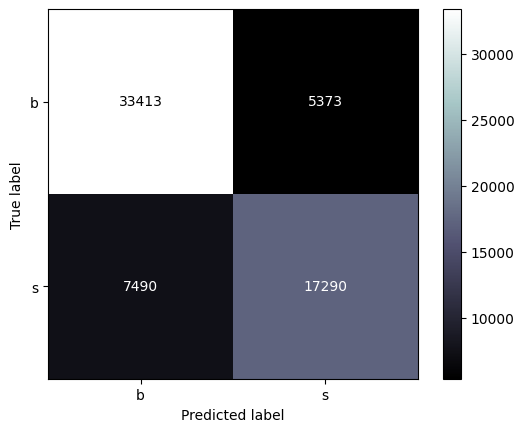

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
confusion_matrix(label_test, label_pred)
disp = ConfusionMatrixDisplay.from_estimator(rf, higgs_test, label_test, cmap="bone")

Figure 3. This is a confusion matrix for the random forest. We can see that the model has predicted the most true labels as b, and most of those are correct. For the misclassifications, is more likely to classify s as b than it is to classify b as s.

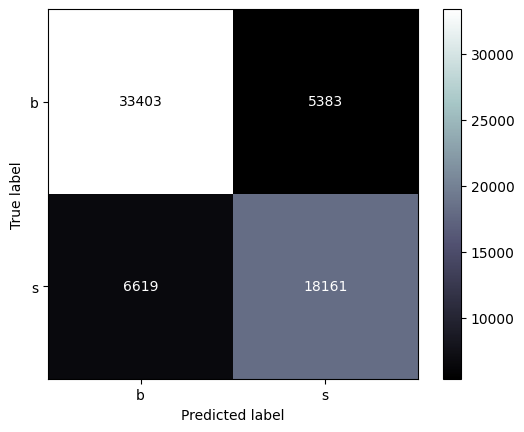

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(gbt, higgs_test, label_test, cmap="bone")

Figure 4. This is a confusion matrix for the gradient boosted trees. Compared to the confusion matrix for the random forest, this model is better at accurately predicting the s class. That's great, since that is the signal that we're looking for (and b is background).

In [53]:
# plot_confusion_matrix(label_test, gbt_label_pred, title="GBT")

In [54]:
confusion_matrix(label_test, gbt_label_pred)

array([[33403,  5383],
       [ 6619, 18161]])

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [55]:
# traindata_weights, testdata_weights, train_weights, test_weights = ...

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)
rfR.fit(higgs_train, weight_train)


RandomForestRegressor(max_depth=3, random_state=0)

In [57]:
gbtR = GradientBoostingRegressor(max_depth=3,
                                  random_state=0)
gbtR.fit(higgs_train, weight_train)

GradientBoostingRegressor(random_state=0)

In [58]:
gbtR_weight_pred = gbtR.predict(higgs_test)

In [59]:
rfR_weight_pred = rfR.predict(higgs_test)

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [60]:
def l2(weight_pred, weight_test):
  '''
  true weight = weight test
  l2 is the sum of squares
  '''
  res = 0
  for i in range(len(weight_pred)):
    diff = weight_pred[i]-weight_test[i]
    res+=(diff**2)
  return res

def l1(weight_pred, weight_test):
  '''
  true weight = weight test
  l2 is the sum of abs
  '''
  res = 0
  for i in range(len(weight_pred)):
    diff = weight_pred[i]-weight_test[i]
    res+=(np.abs(diff))
  return res

In [61]:
label_test

array(['s', 'b', 'b', ..., 's', 's', 's'], dtype=object)

In [62]:
l1(gbtR_weight_pred, weight_test)

51488.970631217286

In [63]:
l2(rfR_weight_pred, weight_test)

111205.2494582705

In [64]:
print("L1 rfR:  {:.0f}".format(l1(rfR_weight_pred, weight_test)))
print("L2 rfR:  {:.0f}".format(l2(rfR_weight_pred, weight_test)))
print("L1 gbtR:  {:.0f}".format(l1(gbtR_weight_pred, weight_test)))
print("L2 gbtR:  {:.0f}".format(l2(gbtR_weight_pred, weight_test)))

L1 rfR:  61896
L2 rfR:  111205
L1 gbtR:  51489
L2 gbtR:  83281


Results: We want to minimize the L1 and L2 scores. The gradient boosted tree regressor has a lower score for both L1 and L2. Yay for gradient boosted trees! I would use that model over the random forest if I had to solve this problem.

# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [65]:
rf.feature_names_in_

array(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt',
       'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt'], dtype=object)

In [66]:
np.argsort(rf.feature_importances_)

array([17, 15,  0, 12, 11, 14,  6, 18, 19, 13, 20,  7, 16,  4,  5,  9, 10,
        8,  3,  2,  1])

In [67]:
rf.feature_importances_


array([7.41877403e-05, 3.07721400e-01, 1.80033390e-01, 1.27289588e-01,
       2.45720894e-02, 4.78642708e-02, 5.37075609e-03, 1.81391088e-02,
       8.55533995e-02, 6.56624122e-02, 7.66902489e-02, 6.90207072e-04,
       8.88482099e-05, 1.09762209e-02, 1.92004599e-03, 7.25891063e-05,
       1.83366876e-02, 6.12524288e-05, 6.58870611e-03, 7.69409311e-03,
       1.46004988e-02])

In [68]:
rf.feature_importances_[np.argsort(rf.feature_importances_)]


array([6.12524288e-05, 7.25891063e-05, 7.41877403e-05, 8.88482099e-05,
       6.90207072e-04, 1.92004599e-03, 5.37075609e-03, 6.58870611e-03,
       7.69409311e-03, 1.09762209e-02, 1.46004988e-02, 1.81391088e-02,
       1.83366876e-02, 2.45720894e-02, 4.78642708e-02, 6.56624122e-02,
       7.66902489e-02, 8.55533995e-02, 1.27289588e-01, 1.80033390e-01,
       3.07721400e-01])

In [69]:
rf.feature_names_in_[np.argsort(rf.feature_importances_)][-4:]

array(['DER_pt_ratio_lep_tau', 'DER_mass_vis',
       'DER_mass_transverse_met_lep', 'DER_mass_MMC'], dtype=object)

In [70]:
random_grid = {'max_depth': [3, 10, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 100, 1000]}

print(random_grid)

{'max_depth': [3, 10, None], 'max_features': ['auto', 'sqrt'], 'n_estimators': [10, 100, 1000]}


 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [71]:
higgsdata_short = higgs_train[rf.feature_names_in_[np.argsort(rf.feature_importances_)][-4:]]

In [72]:
higgsdata_short

,DER_pt_ratio_lep_tau,DER_mass_vis,DER_mass_transverse_met_lep,DER_mass_MMC
183460,1.642,116.642,72.865,134.040
132512,1.077,50.409,57.318,71.573
138401,1.079,58.967,7.184,92.970
103214,1.092,74.853,20.521,100.278
152069,1.230,48.131,22.406,60.718
...,...,...,...,...
168785,1.048,64.281,36.650,89.136
152747,2.069,85.660,89.856,99.609
142586,2.522,164.344,90.843,222.810
136258,1.059,86.883,53.344,122.240


These are the most important features of the data for my model!

In [73]:
print(rf.feature_names_in_[np.argsort(rf.feature_importances_)][-4:])

['DER_pt_ratio_lep_tau' 'DER_mass_vis' 'DER_mass_transverse_met_lep'
 'DER_mass_MMC']


In [74]:
# higgsdata.iloc[:, best_features_index]

In [75]:
# import sklearn

In [76]:
# # Use the random grid to search for best hyperparameters
# # First create the base model to tune
# # Random search of parameters, using 3 fold cross validation,
# # search across 18 different combinations
# random_search = sklearn.model_selection.RandomizedSearchCV(estimator = rf, param_distributions=random_grid,
#                                    n_iter=1, cv=3)#, iid=False)


Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [77]:
# random_search.fit(higgsdata_short, label_train)


In [78]:
# print("Tuned RF  Parameters: {}".format(...))
# print("Best score is {}".format(...))


In [79]:
# df = pd.DataFrame(random_search.cv_results_)


In [80]:
# df

Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [81]:
# rf.fit(traindata, train_label.values.flatten()=="s", max_depth.....)

In [82]:
# # The random forest model by itself
# from sklearn.metrics import roc_curve
# y_pred_grd_rfcat = rf.predict_proba(testdata)[:, 1]

# fpr_rf, tpr_rf, _ = roc_curve(test_label.values.flatten()=="s", rf.predict(y_pred_grd_rfcat))

# plt.figure(1)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.plot(fpr_rf, tpr_rf, label='RF')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend(loc='best')
# plt.show()
